In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Note: you may need to restart the kernel to use updated packages.


In [4]:
diabetes_data = pd.read_csv(r'C:\Users\Pratham Singh Yadav\OneDrive\Desktop\Outbreak\dataset\diabetes.csv')

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='count'>

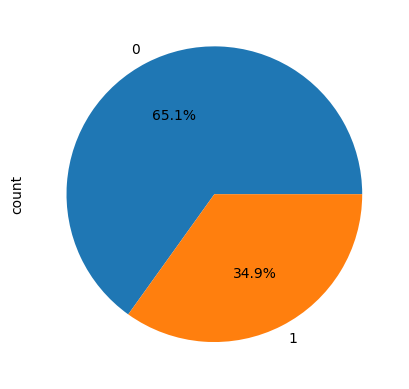

In [9]:
diabetes_data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')

In [10]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='all')

In [11]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
x = diabetes_data.drop(columns = 'Outcome', axis = 1)
y = diabetes_data['Outcome']

In [13]:
x_resampled, y_resampled = tl.fit_resample(x, y)

In [14]:
x.shape, y.shape

((768, 8), (768,))

In [15]:
x_resampled.shape, y_resampled.shape

((658, 8), (658,))

In [16]:
x_train , x_test , y_train , y_test =  train_test_split(x, y, test_size = 0.2, random_state=41)

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2,88,74,19,53,29.0,0.229,22
573,2,98,60,17,120,34.7,0.198,22
429,1,95,82,25,180,35.0,0.233,43
740,11,120,80,37,150,42.3,0.785,48
589,0,73,0,0,0,21.1,0.342,25


In [18]:
x_train.shape

(614, 8)

In [19]:
x_test.shape

(154, 8)

In [20]:
model = svm.SVC(kernel='linear')

In [21]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
y_predc = model.predict(x_test)

In [23]:
print('accuracy_score:', accuracy_score(y_test, y_predc))

accuracy_score: 0.7857142857142857


In [24]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [25]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [26]:
Recall = recall_score(y_test, y_predc)
Precision = precision_score(y_test, y_predc)
F1 = f1_score(y_test, y_predc)
Confusion_matrix = confusion_matrix(y_test, y_predc)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:\n', Confusion_matrix)

Recall: 0.5454545454545454
Precision: 0.7894736842105263
F1: 0.6451612903225806
Confusion_matrix:
 [[91  8]
 [25 30]]


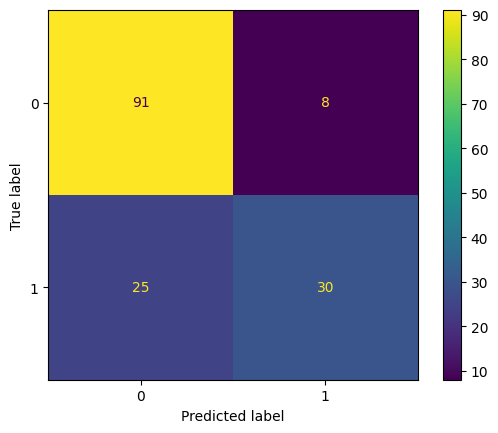

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [28]:
x_resampled_train , x_resampled_test , y_resampled_train , y_resampled_test =  train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=41)

In [29]:
x_resampled_train.shape

(526, 8)

In [30]:
model_resampled = svm.SVC(kernel='linear')

In [31]:
model_resampled.fit(x_resampled_train, y_resampled_train)

SVC(kernel='linear')

In [32]:
y_resampled_predc = model_resampled.predict(x_resampled_test)

In [33]:
print('accuracy_score:', accuracy_score(y_resampled_test, y_resampled_predc))

accuracy_score: 0.8333333333333334


In [34]:
Recall = recall_score(y_resampled_test, y_resampled_predc)
Precision = precision_score(y_resampled_test, y_resampled_predc)
F1 = f1_score(y_resampled_test, y_resampled_predc)
Confusion_matrix = confusion_matrix(y_resampled_test, y_resampled_predc)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:\n', Confusion_matrix)

Recall: 0.6176470588235294
Precision: 0.7
F1: 0.65625
Confusion_matrix:
 [[89  9]
 [13 21]]


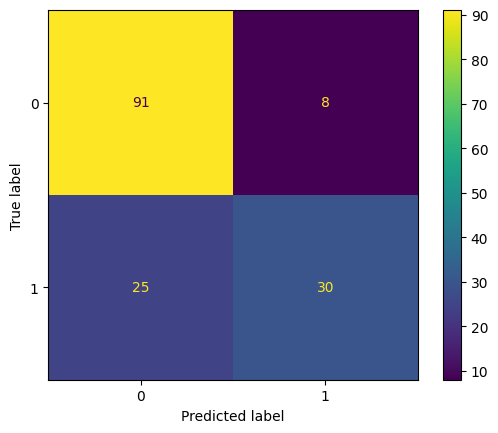

In [35]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

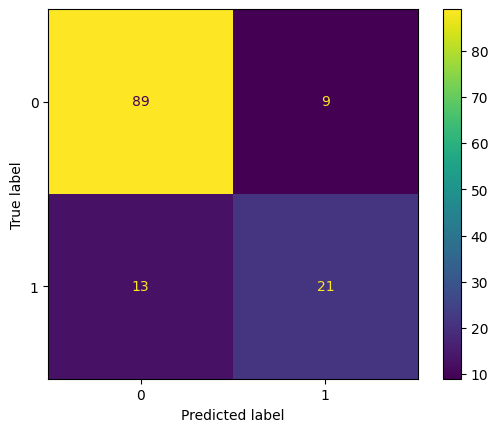

In [36]:
ConfusionMatrixDisplay.from_estimator(model_resampled, x_resampled_test, y_resampled_test)

In [37]:
import pickle
import os 
filename = os.path.join('C:\\Users\\Pratham Singh Yadav\\OneDrive\\Desktop\\Outbreak\\Save_model', 'diabetes_model.sav')
pickle.dump(model_resampled, open(filename, 'wb'))